In [1]:
#library
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
#raed_path
all_folder="/kaggle/input/chest-xray-pneumonia/chest_xray"
train_folder=all_folder+"/train"
test_folder=all_folder+"/test"
validate_folder=all_folder+"/val"
#store_it_there_inside_path
normal_folder_test=test_folder+"/NORMAL/"
pneumonia_folder_test=test_folder+"/PNEUMONIA/"
normal_folder_train=train_folder+"/NORMAL/"
pneumonia_folder_train=train_folder+"/PNEUMONIA/"
normal_folder_validate=validate_folder+"/NORMAL/"
pneumonia_folder_validate=validate_folder+"/PNEUMONIA/"
#get_names of file in folder(names of pic)_by path-of folder
import os
name_files_normal_train=os.listdir(normal_folder_train)
name_files_pneumonia_train=os.listdir(pneumonia_folder_train)
name_files_normal_test=os.listdir(normal_folder_test)
name_files_pneumonia_test=os.listdir(pneumonia_folder_test)
name_files_normal_validate=os.listdir(normal_folder_validate)
name_files_pneumonia_validate=os.listdir(pneumonia_folder_validate)
#store_path_in_Data_frame
import pandas as pd
df_train_normal=pd.DataFrame(name_files_normal_train,columns=["images"])
df_train_normal["labels"]=0
df_train_normal["images"]=normal_folder_train+df_train_normal["images"]


df_train_pneumonia=pd.DataFrame(name_files_pneumonia_train,columns=["images"])
df_train_pneumonia["labels"]=2
df_train_pneumonia["images"]=pneumonia_folder_train+df_train_pneumonia["images"]

df_test_normal=pd.DataFrame(name_files_normal_test,columns=["images"])
df_test_normal["labels"]=0
df_test_normal["images"]=normal_folder_test+df_test_normal["images"]

df_test_pneumonia=pd.DataFrame(name_files_pneumonia_test,columns=["images"])
df_test_pneumonia["labels"]=2
df_test_pneumonia["images"]=pneumonia_folder_test+df_test_pneumonia["images"]

df_validate_normal=pd.DataFrame(name_files_normal_validate,columns=["images"])
df_validate_normal["labels"]=0
df_validate_normal["images"]=normal_folder_validate+df_validate_normal["images"]

df_validate_pneumonia=pd.DataFrame(name_files_pneumonia_validate,columns=["images"])
df_validate_pneumonia["labels"]=1
df_validate_pneumonia["images"]=pneumonia_folder_validate+df_validate_pneumonia["images"]


#concat
DF1=pd.concat([df_train_pneumonia,df_train_normal,df_test_pneumonia,df_test_normal,df_validate_pneumonia,df_validate_normal], ignore_index=True)
#df_test=pd.concat([df_test_pneumonia,df_test_normal],ignore_index=True)
#df_validate=pd.concat([df_validate_pneumonia,df_validate_normal],ignore_index=True)
#shuffle
DF1.sample(frac=1, random_state=42).reset_index(drop=True)
# df_test.sample(frac=1, random_state=42).reset_index(drop=True)
# df_validate.sample(frac=1, random_state=42).reset_index(drop=True)

#convert to matrix
DF1["mat_images"]=DF1['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
# df_train["mat_images"]=df_train['images'].apply(lambda x: plt.imread(x))
# df_validate["mat_images"]=df_validate['images'].apply(lambda x: plt.imread(x))


In [3]:

DATA2_PATH="/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
DATA2_TRAIN_NORNAL=DATA2_PATH+"/Normal/"
DATA2_TRAIN_Tuberculosis=DATA2_PATH+"/Tuberculosis/"

Normal_img=os.listdir(DATA2_TRAIN_NORNAL)
Tuberculosis_img=os.listdir(DATA2_TRAIN_Tuberculosis)
# DATA2_TRAIN_NORNAL=DATA2_TRAIN_NORNAL+Normal_img
# DATA2_TEST_Tuberculosis=DATA2_TEST_Tuberculosis+Tuberculosis_img
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=1
dnorm["images"]=DATA2_TRAIN_NORNAL+dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=3
dtuber["images"]=DATA2_TRAIN_Tuberculosis+dtuber["images"]


DF2=pd.concat([dnorm,dtuber],ignore_index=True)
DF2["mat_images"]=DF2['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF2.sample(frac=1, random_state=42).reset_index(drop=True)




,images,labels,mat_images
0,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[191, 149, 123, 104, 84, 69, 68, 68, 67, 67, ..."
1,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,..."
2,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[18, 11, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."
3,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,..."
4,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[21, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5..."
...,...,...,...
4195,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[4, 5, 6, 5, 4, 4, 4, 5, 3, 106, 119, 127, 13..."
4196,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4,..."
4197,/kaggle/input/tuberculosis-tb-chest-xray-datas...,1,"[[76, 60, 47, 38, 34, 32, 31, 32, 32, 34, 34, ..."
4198,/kaggle/input/tuberculosis-tb-chest-xray-datas...,3,"[[107, 108, 108, 109, 110, 110, 111, 109, 108,..."


In [4]:
F_DATA=pd.concat([DF1,DF2],ignore_index=True)
F_DATA.sample(frac=1, random_state=42).reset_index(drop=True)
F_DATA

,images,labels,mat_images
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,2,"[[75, 74, 69, 50, 4, 4, 1, 23, 21, 23, 22, 24,..."
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,2,"[[0, 0, 18, 12, 35, 36, 58, 56, 59, 77, 64, 91..."
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,2,"[[110, 106, 93, 137, 117, 99, 122, 112, 146, 1..."
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,2,"[[23, 25, 28, 27, 28, 29, 31, 34, 38, 45, 253,..."
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,2,"[[83, 79, 78, 78, 79, 83, 83, 89, 86, 89, 88, ..."
...,...,...,...
10051,/kaggle/input/tuberculosis-tb-chest-xray-datas...,3,"[[2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1,..."
10052,/kaggle/input/tuberculosis-tb-chest-xray-datas...,3,"[[17, 17, 19, 19, 19, 21, 22, 23, 23, 24, 25, ..."
10053,/kaggle/input/tuberculosis-tb-chest-xray-datas...,3,"[[242, 254, 52, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, ..."
10054,/kaggle/input/tuberculosis-tb-chest-xray-datas...,3,"[[181, 205, 201, 201, 201, 203, 204, 206, 211,..."


In [5]:
X=F_DATA["mat_images"]
Y=F_DATA["labels"]

In [6]:
#normalize 
X=X/255


In [7]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(Y,4)


In [8]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8044,)
(8044, 4)
(2012,)
(2012, 4)


In [9]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [10]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8044, 224, 224)
(8044, 4)
(2012, 224, 224)
(2012, 4)


In [12]:
import tensorflow as tf
import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [13]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64) 

Epoch 1/10
126/126 [==============================] - 34s 125ms/step - loss: 0.4659 - accuracy: 0.8291 - val_loss: 0.2189 - val_accuracy: 0.9279
Epoch 2/10
126/126 [==============================] - 13s 104ms/step - loss: 0.1925 - accuracy: 0.9335 - val_loss: 0.1966 - val_accuracy: 0.9423
Epoch 3/10
126/126 [==============================] - 13s 104ms/step - loss: 0.1321 - accuracy: 0.9575 - val_loss: 0.1887 - val_accuracy: 0.9394
Epoch 4/10
126/126 [==============================] - 13s 104ms/step - loss: 0.1180 - accuracy: 0.9586 - val_loss: 0.1324 - val_accuracy: 0.9607
Epoch 5/10
126/126 [==============================] - 13s 105ms/step - loss: 0.0764 - accuracy: 0.9738 - val_loss: 0.1530 - val_accuracy: 0.9498
Epoch 6/10
126/126 [==============================] - 13s 105ms/step - loss: 0.0730 - accuracy: 0.9753 - val_loss: 0.1427 - val_accuracy: 0.9568
Epoch 7/10
126/126 [==============================] - 13s 105ms/step - loss: 0.0609 - accuracy: 0.9792 - val_loss: 0.1462 - val_ac

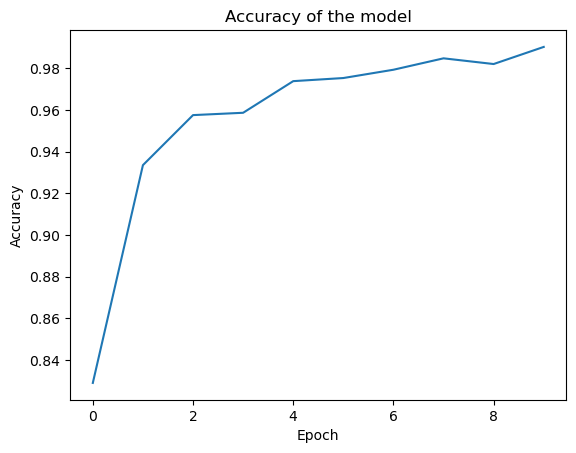

In [14]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

63/63 [==============================] - 2s 14ms/step


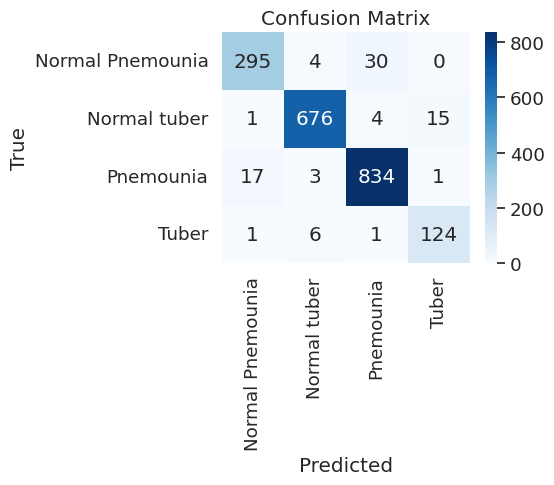

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['Normal Pnemounia', 'Normal tuber', 'Pnemounia', 'Tuber']
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [17]:
print("Classification Report:")
print(classification_report(y_true,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       329
           1       0.98      0.97      0.98       696
           2       0.96      0.98      0.97       855
           3       0.89      0.94      0.91       132

    accuracy                           0.96      2012
   macro avg       0.94      0.95      0.94      2012
weighted avg       0.96      0.96      0.96      2012



In [18]:
model.save('FINAL.h5')